# Mexico Polygon Mesh #

In [1]:
from rpolygonpoint.utils.spark import spark
from rpolygonpoint.utils.plot import plot_polygon, add_polygon, polygon_to_list
from rpolygonpoint.containerpolygon import ContainerPolygon

In [2]:
# Path to data and workspace
path_ws = "path_to_workspace"

In [38]:
# Load data to Mexico polygon
df_mexico_polygon = spark.read.parquet(path_ws + "t_country_polygon")\
    .filter("country_id='MX'")\
    .withColumnRenamed("longitude_id", "coord_x")\
    .withColumnRenamed("latitude_id", "coord_y")

df_mexico_polygon.show(5)

+------------+----------+---------+-----------+----------------+----------+
|country_name|polygon_id|point_seq|    coord_x|         coord_y|country_id|
+------------+----------+---------+-----------+----------------+----------+
|      MEXICO|         1|      1.0|-114.742783|       18.322777|        MX|
|      MEXICO|         1|      2.0|-114.789726|18.3180540000001|        MX|
|      MEXICO|         1|      3.0|-114.796402|18.3188860000001|        MX|
|      MEXICO|         1|      4.0|-114.800568|18.3216629999999|        MX|
|      MEXICO|         1|      5.0|-114.802513|18.3266640000001|        MX|
+------------+----------+---------+-----------+----------------+----------+
only showing top 5 rows



In [39]:
# Spark DataFrame to list
lst_mexico_polygon = polygon_to_list(df_mexico_polygon)

In [40]:
# Generated Mexico polygon mesh

mexico_polygon_mesh = ContainerPolygon(df_mexico_polygon)
mexico_polygon_mesh.set_mesh_bsize(2) # Resize cell of boundary mexico polygon
mexico_polygon_mesh.get_polygon_mesh()

[2021-12-12 11:33:53.986080] - [INFO] - [write_persist] :: Persist DataFrame PolygonDelimietRectangle with 35 rows: StorageLevel Disk Serialized 1x Replicated!
[2021-12-12 11:33:58.228223] - [INFO] - [write_persist] :: Persist DataFrame EndPolygonPoint with 4,169 rows: StorageLevel Disk Serialized 1x Replicated!
[2021-12-12 11:34:00.622878] - [INFO] - [write_persist] :: Persist DataFrame PolygonSidesPoint with 4,134 rows: StorageLevel Disk Serialized 1x Replicated!
[2021-12-12 11:34:00.630416] - [INFO] - [unpersist] :: Unpersist DataFrame EndPolygonPoint!
[2021-12-12 11:34:04.777663] - [INFO] - [write_persist] :: Persist DataFrame PolygonMesh with 2,608 rows: StorageLevel Disk Serialized 1x Replicated!
[2021-12-12 11:34:13.957016] - [INFO] - [write_persist] :: Persist DataFrame ContainerPolygon with 720 rows: StorageLevel Disk Serialized 1x Replicated!
[2021-12-12 11:34:26.237640] - [INFO] - [write_persist] :: Persist DataFrame PolygonDelimietRectangle with 407 rows: StorageLevel Disk 

In [42]:
df_mexico_polygon_mesh = mexico_polygon_mesh.df_polygon_mesh
df_mexico_polygon_mesh.show(5)

+----------+---------+-----------+---------+-------+-------+---------+
|polygon_id|  cell_id|sub_cell_id|point_seq|coord_x|coord_y|cell_type|
+----------+---------+-----------+---------+-------+-------+---------+
|        35|-110 23 1|-220 46 0.5|        4| -110.0|   23.5|undecided|
|        35|-110 23 1|-220 46 0.5|        3| -109.5|   23.5|undecided|
|        35|-110 23 1|-220 46 0.5|        2| -109.5|   23.0|undecided|
|        35|-110 23 1|-220 46 0.5|        1| -110.0|   23.0|undecided|
|        35|-111 31 1|-221 62 0.5|        4| -110.5|   31.5|undecided|
+----------+---------+-----------+---------+-------+-------+---------+
only showing top 5 rows



In [43]:
# Split cell type of Mexico polygon mesh

lst_mexico_cell_undecided = polygon_to_list(
    df_polygon=df_mexico_polygon_mesh.filter("cell_type = 'undecided'"), 
    polygon_id=["polygon_id", "cell_id", "sub_cell_id"]
)

lst_mexico_cell_inside = polygon_to_list(
    df_polygon=df_mexico_polygon_mesh.filter("cell_type = 'inside'"), 
    polygon_id=["polygon_id", "cell_id", "sub_cell_id"]
)

(<AxesSubplot:title={'center':'Mexico Polygon Mesh(Size=1, BSize=3)'}, xlabel='coord x', ylabel='coord y'>,
 <Figure size 7200x7200 with 1 Axes>)

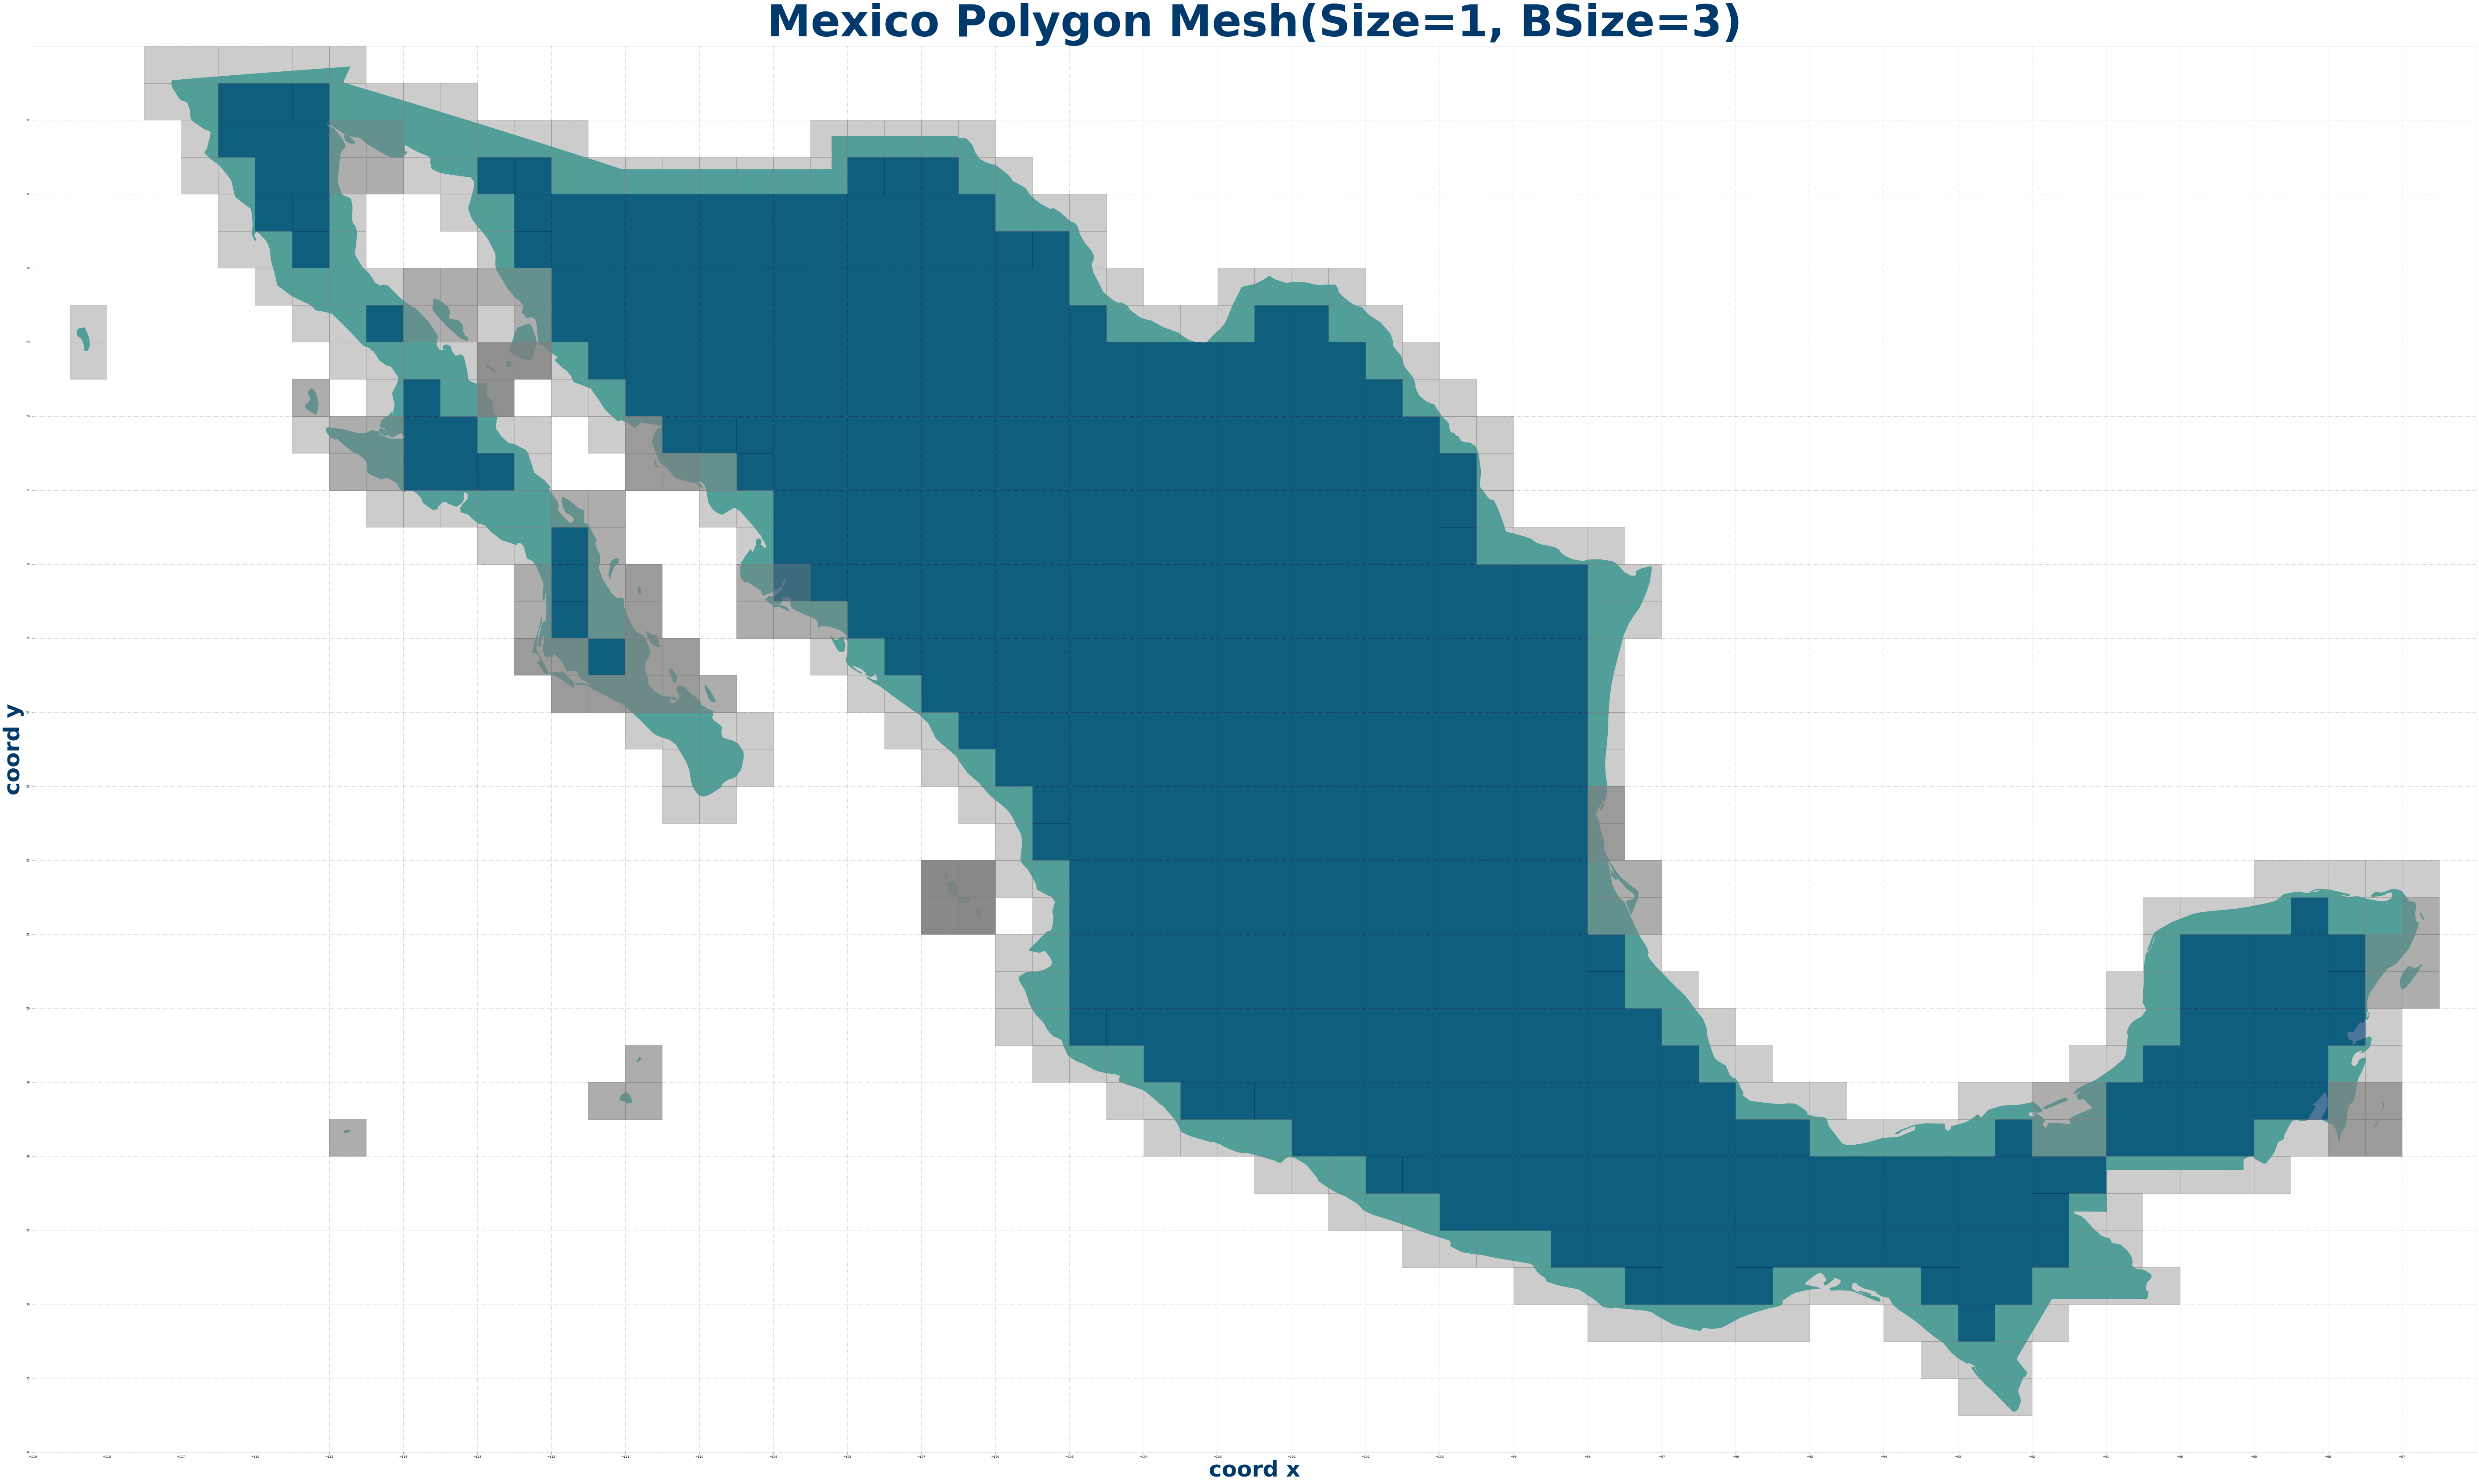

In [49]:
# Generated plot of Mexico polygon mesh
fig = plot_polygon(lst_mexico_polygon, tick=1, title="Mexico Polygon Mesh(Size=1, BSize=3)",  figsize=(100, 100), alpha=.8, fontsize=5)
add_polygon(fig, lst_mexico_cell_inside, color="#00396C", alpha=.7)
add_polygon(fig, lst_mexico_cell_undecided, color="gray", alpha=.4)

In [47]:
# Save plot of Mexico polygon mesh
fig[1].savefig(path_ws + "mx_polygon_mesh.png")